In [1]:
pip install tensorflow numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
batch_size = 32
epochs = 100
image_size = (64, 64)  # Adjust the image size as needed

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(36, activation='softmax'))  # 26 for letters (A-Z) + 10 for numbers (0-9)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    'Numbers-Alphabets/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    'Numbers-Alphabets/val',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Define a learning rate schedule
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 60:
        lr *= 0.5
    elif epoch > 30:
        lr *= 0.75
    return lr

# Use a learning rate scheduler
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Train the model with the updated settings
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[lr_callback]
)

# Save the model
#model.save('alphabet_number_recognition_model_v2.h5')






Found 864 images belonging to 36 classes.
Found 216 images belonging to 36 classes.
Epoch 1/100


27/27 [==============================] - 4s 87ms/step - loss: 3.5808 - accuracy: 0.0359 - val_loss: 3.5015 - val_accuracy: 0.1094 - lr: 0.0010
Epoch 2/100
27/27 [==============================] - 2s 81ms/step - loss: 3.2667 - accuracy: 0.1111 - val_loss: 2.2043 - val_accuracy: 0.3177 - lr: 0.0010
Epoch 3/100
27/27 [==============================] - 2s 74ms/step - loss: 2.5911 - accuracy: 0.2720 - val_loss: 1.5231 - val_accuracy: 0.4948 - lr: 0.0010
Epoch 4/100
27/27 [==============================] - 2s 77ms/step - loss: 2.1623 - accuracy: 0.3403 - val_loss: 1.2647 - val_accuracy: 0.5938 - lr: 0.0010
Epoch 5/100
27/27 [==============================] - 2s 74ms/step - loss: 1.9002 - accuracy: 0.4039 - val_loss: 1.0291 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 6/100
27/27 [==============================] - 2s 79ms/step - loss: 1.6888 - accuracy: 0.4861 - val_loss: 0.9832 - val_accuracy: 

27/27 [==============================] - 2s 71ms/step - loss: 0.1810 - accuracy: 0.9363 - val_loss: 0.1009 - val_accuracy: 0.9479 - lr: 5.0000e-04
Epoch 96/100
27/27 [==============================] - 2s 81ms/step - loss: 0.2016 - accuracy: 0.9201 - val_loss: 0.1106 - val_accuracy: 0.9635 - lr: 5.0000e-04
Epoch 97/100
27/27 [==============================] - 3s 100ms/step - loss: 0.1838 - accuracy: 0.9387 - val_loss: 0.1019 - val_accuracy: 0.9740 - lr: 5.0000e-04
Epoch 98/100
27/27 [==============================] - 3s 95ms/step - loss: 0.2117 - accuracy: 0.9236 - val_loss: 0.0616 - val_accuracy: 0.9688 - lr: 5.0000e-04
Epoch 99/100
27/27 [==============================] - 3s 102ms/step - loss: 0.1859 - accuracy: 0.9421 - val_loss: 0.0449 - val_accuracy: 0.9740 - lr: 5.0000e-04
Epoch 100/100
27/27 [==============================] - 3s 103ms/step - loss: 0.1752 - accuracy: 0.9340 - val_loss: 0.0356 - val_accuracy: 0.9792 - lr: 5.0000e-04


In [3]:
# Create a mapping for numeric values (0-9)
mapping = {
    10: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    11: 'A',
    12: 'B',
    13: 'C',
    14: 'D',
    15: 'E',
    16: 'F',
    17: 'G',
    18: 'H',
    19: 'I',
    20: 'J',
    21: 'K',
    22: 'L',
    23: 'M',
    24: 'N',
    25: 'O',
    26: 'P',
    27: 'Q',
    28: 'R',
    29: 'S',
    30: 'T',
    31: 'U',
    32: 'V',
    33: 'W',
    34: 'X',
    35: 'Y',
    36: 'Z'
}

# Example usage
numeric_value = 14
alphabetic_value = mapping.get(numeric_value, None)

if alphabetic_value is not None:
    print(f"The alphabetic value for {numeric_value} is {alphabetic_value}")
else:
    print(f"No mapping found for {numeric_value}")


The alphabetic value for 14 is D


1/1 [==============================] - 0s 16ms/step
9
Predicted class: 9


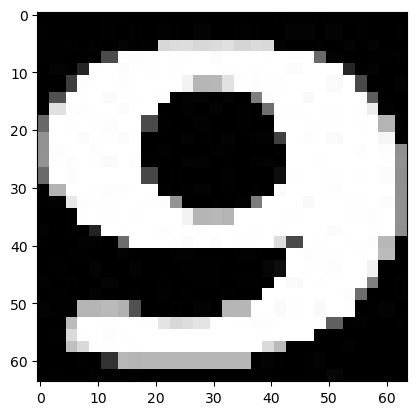

In [111]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
#loaded_model = tf.keras.models.load_model('alphabet_number_recognition_model.h5')

# Load an image for prediction
img_path = r'\Numbers-Alphabets\train\class_9\class_9_19.jpg'  
# Replace with the path to your test image
img = image.load_img(img_path, target_size=image_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale the image

# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
print(predicted_class)
predicted_class = mapping.get(predicted_class,None)

print("Predicted class:", predicted_class)


plt.imshow(img)

In [74]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
#loaded_model = tf.keras.models.load_model('alphabet_number_recognition_model.h5')

# Load an image for prediction
img_path = r'C:\Users\Numbers-Alphabets\train\class_A\class_A_2.jpg'  # Replace with the path to your test image
img = image.load_img(img_path, target_size=image_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale the image

# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
predicted_class = mapping.get(predicted_class,None)

print(predicted_class)

print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 16ms/step
0
Predicted class: 0


In [70]:
pip install mplcursors

Note: you may need to restart the kernel to use updated packages.


In [143]:
pip install --upgrade pytesseract opencv-python

Note: you may need to restart the kernel to use updated packages.


In [144]:
import cv2
import pytesseract

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load an image
image_path = r'C:\Users\whiteplate_normal\AB48HWZ.png'
image = cv2.imread(image_path)

# Check if the image is successfully loaded
if image is None:
    print("Error: Unable to read the image.")
else:
    # Resize the image
    resized_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    # Convert to grayscale
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding
    _, thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Perform OCR text recognition with custom configuration
    custom_config = r'--oem 3 --psm 6 -l eng'
    text = pytesseract.image_to_string(thresholded_image, config=custom_config)

    # Print the recognized text
    print("Recognized Text:", text)


Recognized Text: m AB48 HWZ



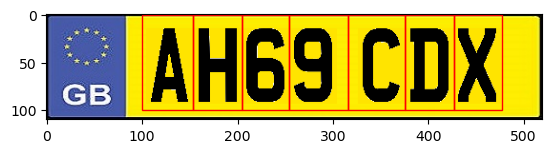

1/1 [==============================] - 0s 31ms/step


In [147]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to display the image with rectangles
def display_image_with_rectangles(image_path, rectangle_coordinates):
    # Open the image
    img = Image.open(image_path)

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(img)

    # Add rectangles to the image
    for (x1, y1, x2, y2) in rectangle_coordinates:
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    # Show the image with rectangles
    plt.show()

# Function to process and predict the classes
def process_and_predict_classes(image_path, rectangle_coordinates, model, mapping, target_size=(64, 64)):
    # Open the image
    original_image = Image.open(image_path)

    # Display the original image with rectangles
    display_image_with_rectangles(image_path, rectangle_coordinates)

    # Initialize a list to store the predicted classes
    predicted_classes = []

    # Iterate through rectangle coordinates, crop, resize, invert colors, and predict class for each rectangle
    for i, (x1, y1, x2, y2) in enumerate(rectangle_coordinates):
        rectangle_image = original_image.crop((x1, y1, x2, y2))

        # Resize the image to the target size
        rectangle_image_resized = rectangle_image.resize(target_size)

        # Invert the colors
        inverted_image = ImageOps.invert(rectangle_image_resized)

        # Append the inverted rectangle to the list
        cropped_resized_image = inverted_image

        # Convert the inverted image to a format suitable for prediction
        img_array = np.array(cropped_resized_image) / 255.0  # Rescale the image

        # Make predictions
        predictions = model.predict(np.expand_dims(img_array, axis=0))
        predicted_class = np.argmax(predictions[0])

        # Append the predicted class to the list
        predicted_classes.append(mapping.get(predicted_class, None))

    return predicted_classes

if __name__ == "__main__":
    # Replace 'your_image.jpg' with the path to your image
    image_path = r'C:\Users\yellowplate_normal\AH69CDX.png'

    # Replace rectangle_coordinates with the actual coordinates for each rectangle
    rectangle_coordinates = [
        (100, 0, 153, 100),  # Coordinates for rectangle 1
        (153, 0, 205, 100),  # Coordinates for rectangle 2
        (205, 0, 254, 100),  # Coordinates for rectangle 3
        (254, 0, 316, 100),  # Coordinates for rectangle 4
        (316, 0, 375, 100),  # Coordinates for rectangle 5
        (375, 0, 427, 100),  # Coordinates for rectangle 6
        (427, 0, 477, 100),  # Coordinates for rectangle 7
    ]

    # Call the function to process and predict classes
    predicted_classes = process_and_predict_classes(image_path, rectangle_coordinates, model, mapping)

    # Print the predicted text
    #print("Predicted Text:", " ".join(predicted_classes))


In [2]:
import cv2
import pytesseract
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import webbrowser
from io import BytesIO
import base64
import tkinter as tk
from tkinter import filedialog, ttk

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Function to display the image with rectangles
def display_image_with_rectangles(image_path, rectangle_coordinates):
    # Open the image
    img = Image.open(image_path)

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(img)

    # Add rectangles to the image
    for (x1, y1, x2, y2) in rectangle_coordinates:
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    # Show the image with rectangles
    plt.show()

# Function to process and predict classes using OCR results
def process_and_predict_classes_with_ocr(image_path, rectangle_coordinates, custom_config):
    # Load an image
    image = cv2.imread(image_path)

    # Check if the image is successfully loaded
    if image is None:
        print("Error: Unable to read the image.")
        return

    # Resize the image
    resized_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    # Convert to grayscale
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding
    _, thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Perform OCR text recognition with custom configuration
    text = pytesseract.image_to_string(thresholded_image, config=custom_config)

    # Print the recognized text
    print("Recognized Text:", text)

    # Display the original image with rectangles
    display_image_with_rectangles(image_path, rectangle_coordinates)

    # Customize the content you want to display in the HTML window
    custom_content = f"Predicted Text based on OCR: {text}"

    # Create an HTML window to display the customized content and input image
    display_custom_content_html(image_path, custom_content)

    return text

# Function to create an HTML file with custom content and open it in a new tab
def display_custom_content_html(image_path, content):
    # Open the image
    input_image = Image.open(image_path)
    # Resize the image for display
    input_image.thumbnail((400, 300))

    # HTML template with modified UI
    html_template = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Number Plate Recognition</title>
        <style>
            body {{
                font-family: 'Helvetica', sans-serif;
                text-align: center;
                padding: 20px;
                background-color: #f0f0f0;
            }}
            h1 {{
                color: #3498db;
            }}
            hr {{
                border: 1px solid #3498db;
                margin: 20px 0;
            }}
            img {{
                max-width: 100%;
                height: auto;
                display: block;
                margin: auto;
                border: 1px solid #ddd;
                border-radius: 8px;
                box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            }}
            .prediction {{
                font-size: 18px;
                margin-top: 20px;
                color: #2ecc71;
            }}
        </style>
    </head>
    <body>
        <h1>Number Plate Recognition</h1>
        <hr>
        </br>
        <p>Given input image is</p>
        <img src="data:image/png;base64,{get_base64_encoded_image(input_image)}" alt="Input Image">
        </br>
        <p class="prediction">{content}</p>
        <hr>
    </body>
    </html>
    """

    # Save HTML content to a file
    with open('custom_content.html', 'w') as html_file:
        html_file.write(html_template)

    # Open the HTML file in the default web browser
    webbrowser.open('custom_content.html')

# Function to get base64 encoded image for embedding in HTML
def get_base64_encoded_image(image):
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

# Function to open a file dialog for image selection
def select_image():
    file_path = filedialog.askopenfilename(title="Select Image", filetypes=[("Image files", "*.png;*.jpg;*.jpeg")])
    if file_path:
        process_selected_image(file_path)

# Function to process the selected image
def process_selected_image(image_path):
    # Replace rectangle_coordinates with the actual coordinates for each rectangle
    rectangle_coordinates = [
        (100, 0, 153, 100),  # Coordinates for rectangle 1
        (153, 0, 205, 100),  # Coordinates for rectangle 2
        (205, 0, 254, 100),  # Coordinates for rectangle 3
        (254, 0, 316, 100),  # Coordinates for rectangle 4
        (316, 0, 375, 100),  # Coordinates for rectangle 5
        (375, 0, 427, 100),  # Coordinates for rectangle 6
        (427, 0, 477, 100),  # Coordinates for rectangle 7
    ]

    # Tesseract configuration
    custom_config = r'--oem 3 --psm 6 -l eng'

    # Call the function to process and predict classes with OCR
    predicted_text = process_and_predict_classes_with_ocr(image_path, rectangle_coordinates, custom_config)

    # Print the predicted text
    print("Predicted Text:", predicted_text)

# Tkinter GUI setup
root = tk.Tk()
root.title("Number Plate Recognition")

# Style for the GUI
style = ttk.Style()
style.configure("TButton", padding=(10, 5), font='Helvetica 12')
style.configure("TLabel", padding=(10, 5), font='Helvetica 12')
style.configure("TFrame", padding=(10, 5), font='Helvetica 12')

# Frame to hold the content
frame = ttk.Frame(root)
frame.pack(pady=20, padx=20)

# Custom text label
custom_text = ttk.Label(frame, text="Please upload an image with license plate:")
custom_text.grid(row=0, column=0, pady=20, padx=20)

# Button to select an image
select_button = ttk.Button(frame, text="Select Image", command=select_image)
select_button.grid(row=1, column=0, pady=20, padx=20)

# Start the Tkinter main loop
root.mainloop()
